In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("../data/mnist/")
images = mnist.train.images

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz


In [3]:
def xavier_initializer(shape):
    return tf.random_normal(shape=shape, stddev=1/shape[0])

In [4]:
# Generator
z_size = 100 # Latent vector dimension
g_w1_size = 400 
g_out_size = 28 * 28

# Discriminator
x_size = 28 * 28
d_w1_size = 400
d_out_size = 1

In [5]:
z = tf.placeholder('float', shape=(None, z_size))
X = tf.placeholder('float', shape=(None, x_size))

In [6]:
g_weights = {
    'w1': tf.Variable(xavier_initializer(shape=(z_size, g_w1_size))),
    'b1': tf.Variable(tf.zeros(shape=[g_w1_size])),
    'out': tf.Variable(xavier_initializer(shape=(g_w1_size, g_out_size))),
    'b2': tf.Variable(tf.zeros(shape=[g_out_size])),
}

d_weights ={
    'w1': tf.Variable(xavier_initializer(shape=(x_size, d_w1_size))),
    'b1': tf.Variable(tf.zeros(shape=[d_w1_size])),
    'out': tf.Variable(xavier_initializer(shape=(d_w1_size, d_out_size))),
    'b2': tf.Variable(tf.zeros(shape=[d_out_size])),
}

In [7]:
def G(z, w=g_weights):
    h1 = tf.nn.relu(tf.matmul(z, w['w1']) + w['b1'])
    return tf.sigmoid(tf.matmul(h1, w['out']) + w['b2'])

def D(x, w=d_weights):
    h1 = tf.nn.relu(tf.matmul(x, w['w1']) + w['b1'])
    return tf.sigmoid(tf.matmul(h1, w['out']) + w['b2'])

In [12]:
def generate_z(n=1):
    return np.random.normal(size=(n, z_size))

In [13]:
G_objective = -tf.reduce_mean(tf.log(D(G(z))))
D_objective = -tf.reduce_mean(tf.log(D(X)) + tf.log(1 - D(G(z))))

In [14]:
G_opt = tf.train.AdamOptimizer().minimize(G_objective, var_list=g_weights.values())
D_opt = tf.train.AdamOptimizer().minimize(D_objective, var_list=d_weights.values())

In [16]:
sample = G(z)

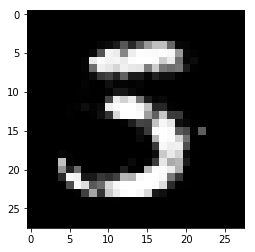

In [17]:
# Hyper-parameters
epochs = 50000
batch_size = 128

# Session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for _ in range(epochs):
        sess.run(G_opt, feed_dict={z: generate_z(batch_size)})
        sess.run(D_opt, feed_dict={
            X: images[np.random.choice(range(len(images)), batch_size)].reshape(batch_size, x_size),
            z: generate_z(batch_size),
        })

    # Show a random image
    image = sess.run(sample, feed_dict={z:generate_z()})
    plt.imshow(image.reshape(28, 28), cmap='gray')